<div style='text-align: center;'>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQzJzIHdangJTrH2mFXFgsLjuLCjpfXXwbxg&usqp=CAU' width='100'/>
    <h1>Sharif University of Technology</h1>
    <h2>Natural Language Processing</h2>
    <h3>Final Project</h3>
    <h4>Spoiler classification and summary generation</h4>
    <p><strong>Authors:</strong> Parnian Razavipour, Mobina Salimipanah</p>
</div>
<hr/>


# Dataset Preparation and EDA


In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d rmisra/imdb-spoiler-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rmisra/imdb-spoiler-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 94% 312M/331M [00:01<00:00, 220MB/s]
100% 331M/331M [00:01<00:00, 184MB/s]


In [3]:
!unzip imdb-spoiler-dataset.zip
!ls

Archive:  imdb-spoiler-dataset.zip
  inflating: IMDB_movie_details.json  
  inflating: IMDB_reviews.json       
IMDB_movie_details.json  IMDB_reviews.json  imdb-spoiler-dataset.zip  sample_data


In [1]:
import pandas as pd
movie_details_df = pd.read_json('IMDB_movie_details.json', lines=True)

movie_details_df.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get a summary of the dataset
movie_details_df.describe(include='all')

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
count,1572,1572,1572,1572,1572.000000,1572,1572
unique,1572,1572,132,237,NaN,1208,1340
top,tt0114142/,"The marriage of David Burgess, a senior execut...",1h 44min,"[Action, Adventure, Sci-Fi]",NaN,2017-12-15,
freq,1,1,40,68,NaN,5,233
mean,NaN,NaN,NaN,NaN,7.071819,NaN,NaN
std,NaN,NaN,NaN,NaN,0.967966,NaN,NaN
min,NaN,NaN,NaN,NaN,2.400000,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,7.100000,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.800000,NaN,NaN


In [ ]:
# Check for missing values
movie_details_df.isnull().sum()


movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

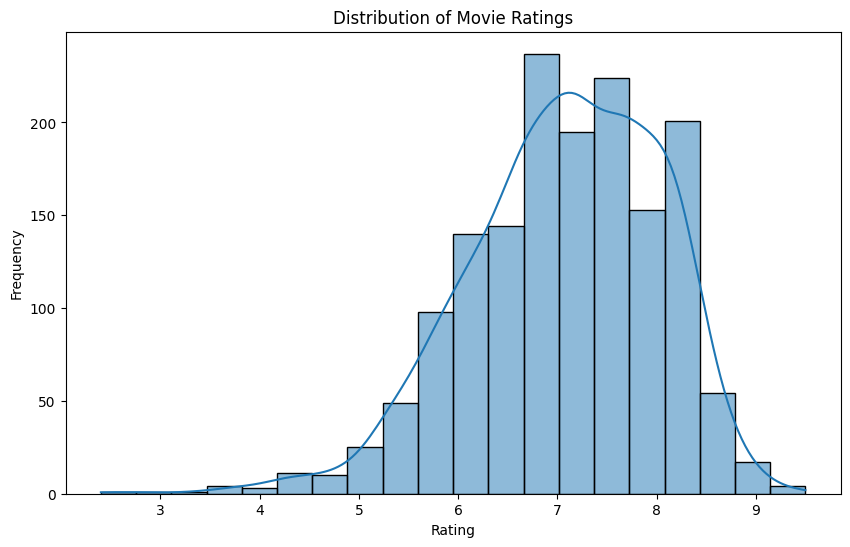

In [ ]:
# Plot distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_details_df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


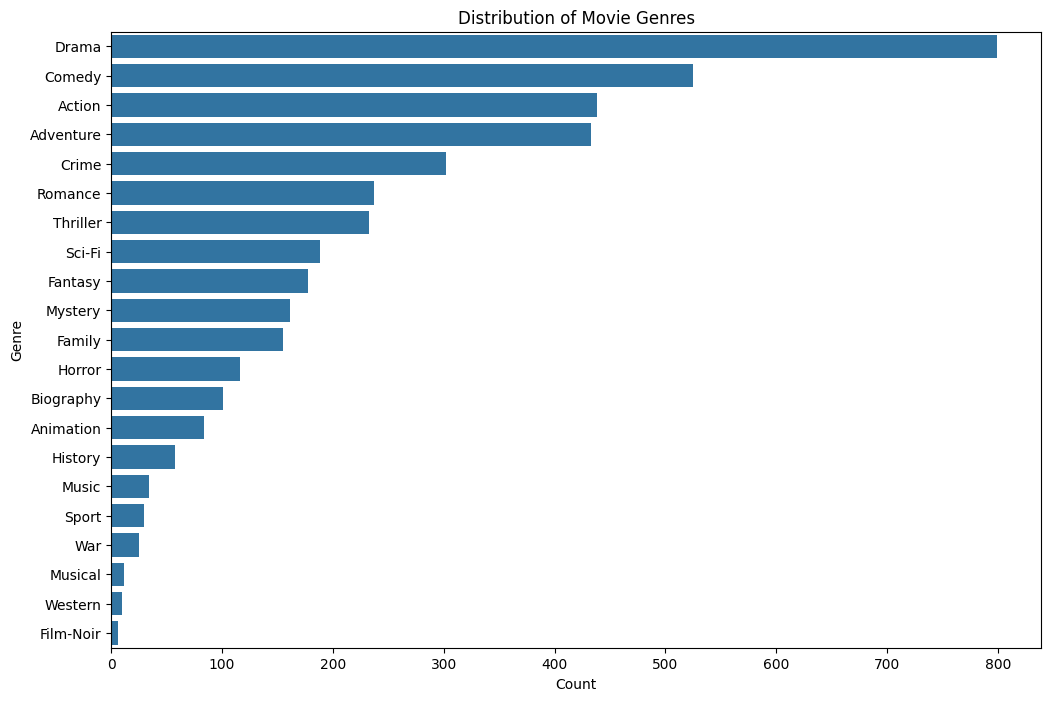

In [ ]:
# Explode the genres column to count each genre separately
genres_exploded = movie_details_df.explode('genre')

# Plot the distribution of movie genres
plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=genres_exploded, order=genres_exploded['genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


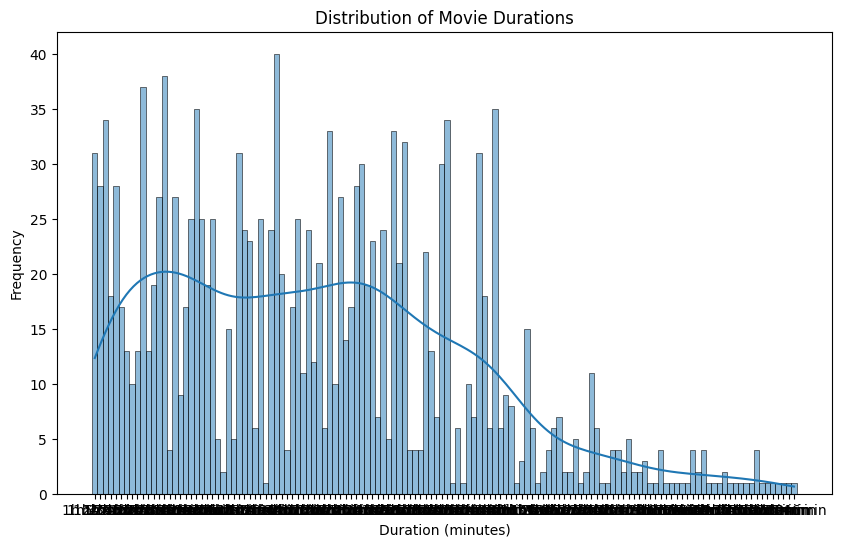

In [ ]:
# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movie_details_df['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

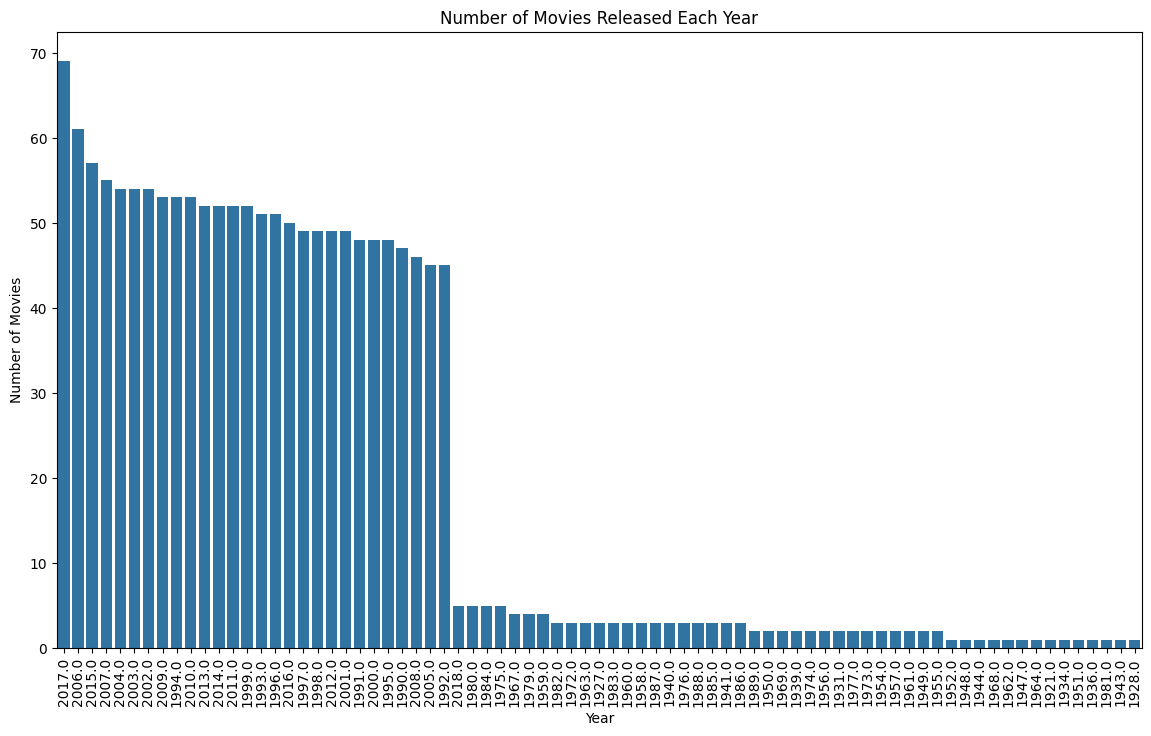

In [ ]:
movie_details_df['release_date'] = pd.to_datetime(movie_details_df['release_date'], errors='coerce')

# Extract year from release_date
movie_details_df['release_year'] = movie_details_df['release_date'].dt.year

# Plot the number of movies released each year
plt.figure(figsize=(14, 8))
sns.countplot(x='release_year', data=movie_details_df, order=movie_details_df['release_year'].value_counts().index)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


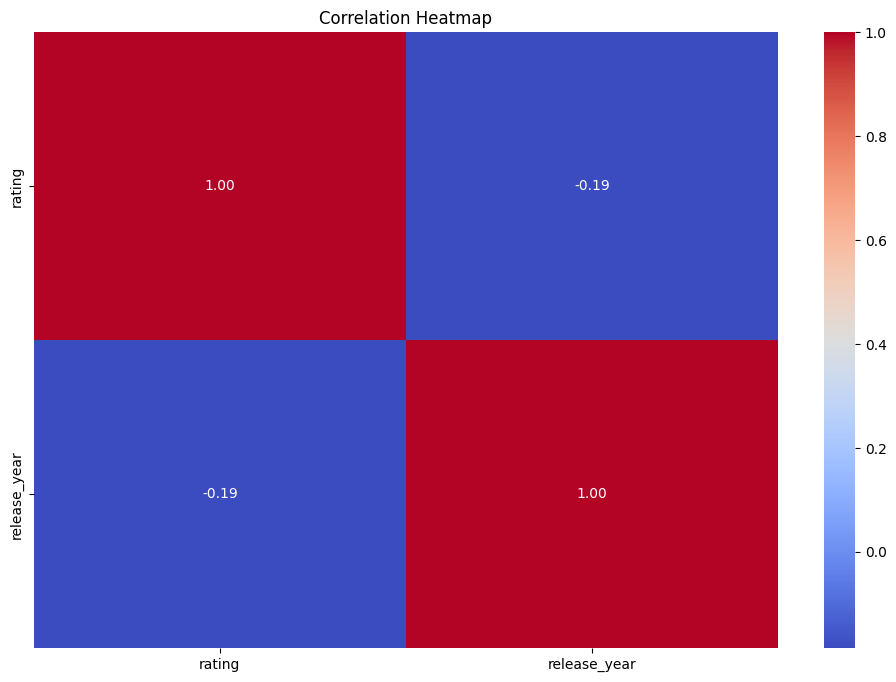

In [ ]:
numeric_cols = movie_details_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(f"Total number of rows in the dataset: {movie_details_df.shape[0]}")

Total number of rows in the dataset: 1572


In [2]:
data = movie_details_df[['plot_summary', 'plot_synopsis']]
data.head()

,plot_summary,plot_synopsis
0,"Former CIA analyst, Jack Ryan is in England wi...","Jack Ryan (Ford) is on a ""working vacation"" in..."
1,"Billy (Michael Douglas), Paddy (Robert De Niro...",Four boys around the age of 10 are friends in ...
2,"The setting is Camp Firewood, the year 1981. I...",
3,"Fred C. Dobbs and Bob Curtin, both down on the...",Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,Tracy Flick is running unopposed for this year...,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.replace('\n', ' ')  # Replace newlines with spaces
    text = text.replace('\r', ' ')  # Replace carriage returns with spaces
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])  # Remove special characters
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text cleaning to the dataset
data['plot_summary'] = data['plot_summary'].apply(clean_text)
data['plot_synopsis'] = data['plot_synopsis'].apply(clean_text)

<ipython-input-8-1769cf9f1984>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plot_summary'] = data['plot_summary'].apply(clean_text)
<ipython-input-8-1769cf9f1984>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plot_synopsis'] = data['plot_synopsis'].apply(clean_text)


In [3]:
from sklearn.model_selection import train_test_split
train_data, temp_data = train_test_split(data, test_size=0.25, random_state=42)

# Split the remainder into test and validation sets
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Display the sizes of each dataset
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 1179
Validation set size: 197
Test set size: 196


In [4]:
pip install datasets

In [5]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

In [6]:
from transformers import BigBirdTokenizer, DataCollatorWithPadding


tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [7]:
import torch  # Import torch for GPU utilization

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
def tokenize_function(examples):
    model_inputs = tokenizer(
        examples['plot_synopsis'],
        truncation=True,
        padding='max_length',
        max_length=3000,
        return_tensors="pt",
    )
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples['plot_summary'],
            truncation=True,
            padding='max_length',
            max_length=315,
            return_tensors="pt"
        )
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

In [9]:
print(train_dataset.column_names)


['plot_summary', 'plot_synopsis', '__index_level_0__']


In [10]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
# test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1179 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/197 [00:00<?, ? examples/s]

In [11]:
# Remove the original columns to avoid issues during training
train_dataset = train_dataset.remove_columns(['plot_summary', 'plot_synopsis'])
val_dataset = val_dataset.remove_columns(['plot_summary', 'plot_synopsis'])
# test_dataset = test_dataset.remove_columns(['plot_summary', 'plot_synopsis'])


In [12]:
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
# test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])



In [ ]:
print("Sample data:", train_dataset[0])

Sample data: {'input_ids': tensor([   65,   391, 21569,  ...,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1,  ..., 0, 0, 0]), 'labels': tensor([   65,   388,   750,   432,  1068,   363,  2930,   391, 24455,   756,
        18404,   388, 14134,   391, 21569,  5461, 12095,   419,  9758,   385,
          771,   456,   363,  1319,  8897,   387,   363,  3766,   391, 13868,
         5821,  5383, 11604,   407,   363, 29642,   391, 40719,  4741,   387,
          363, 23544,  7078,  7194,   391, 21569, 10726,   385,  1817,   358,
        10200,   391,  6799,   363,  3764,   456,   358,  8685,  4809,  4528,
          363,   818,  8897,   896,   914, 34239,   391, 21569,   647,   363,
         4170,   391, 15488,   387,   612, 12278,  6579,   391,   363,  9045,
         4969,   400, 47810,  5520,   391, 21569,   385,  6677,   618, 22769,
          430,   363,  2959,   391, 21569,  2559,   708,  9509,   391,  4170,
        13992,   708,  2940,  1305,   391,   363,  2877,   452,   708, 13

# Model

In [13]:
from transformers import BigBirdPegasusForConditionalGeneration, Trainer, TrainingArguments

# Load the pretrained BigBirdPegasus model for conditional generation
model = BigBirdPegasusForConditionalGeneration.from_pretrained('google/bigbird-pegasus-large-arxiv')
model.to(device)  # Move model to GPU

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.31G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

BigBirdPegasusForConditionalGeneration(
  (model): BigBirdPegasusModel(
    (shared): BigBirdPegasusScaledWordEmbedding(96103, 1024, padding_idx=0)
    (encoder): BigBirdPegasusEncoder(
      (embed_tokens): BigBirdPegasusScaledWordEmbedding(96103, 1024, padding_idx=0)
      (embed_positions): BigBirdPegasusLearnedPositionalEmbedding(4096, 1024)
      (layers): ModuleList(
        (0-15): 16 x BigBirdPegasusEncoderLayer(
          (self_attn): BigBirdPegasusEncoderAttention(
            (self): BigBirdPegasusBlockSparseAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
            )
            (output): Linear(in_features=1024, out_features=1024, bias=False)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): NewGELUAc

In [14]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


In [15]:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4, # Reduce physical batch size
    gradient_accumulation_steps=2,
    warmup_steps=1000,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-05,
    gradient_checkpointing=True,
    fp16 = False,

)


In [16]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    data_collator=data_collator,         # data collator
)

In [17]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi


Thu Aug  8 12:17:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0              29W /  70W |   2305MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)
Input ids are automatically padded from 3000 to 3008 to be a multiple of `config.block_size`: 64
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss
0,9.154700,8.426955
2,4.435600,4.062250


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 256, 'num_beams': 5, 'length_penalty': 0.8}
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/gen

Epoch,Training Loss,Validation Loss
0,9.154700,8.426955
2,3.988500,3.674802


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 256, 'num_beams': 5, 'length_penalty': 0.8}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 256, 'num_beams': 5, 'length_penalty': 0.8}


TrainOutput(global_step=441, training_loss=6.782574472513869, metrics={'train_runtime': 8511.3452, 'train_samples_per_second': 0.416, 'train_steps_per_second': 0.052, 'total_flos': 2.9835914821632e+16, 'train_loss': 6.782574472513869, 'epoch': 2.989830508474576})

In [19]:
!pip install rouge_score nltk prettytable


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=317264d4e42de1a093413a020f16227d7ef4e374dd673dca94027845adc91315
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [20]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
from prettytable import PrettyTable
from transformers import BigBirdPegasusForConditionalGeneration, AutoTokenizer
from datasets import load_metric

# Ensure you have downloaded the nltk datasets used in BLEU score calculation
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
model_path = "./finetuned_model"
tokenizer_path = "./finetuned_tokenizer"

model.save_pretrained(model_path)
tokenizer.save_pretrained(tokenizer_path)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 256, 'num_beams': 5, 'length_penalty': 0.8}


('./finetuned_tokenizer/tokenizer_config.json',
 './finetuned_tokenizer/special_tokens_map.json',
 './finetuned_tokenizer/spiece.model',
 './finetuned_tokenizer/added_tokens.json')

In [22]:
model = BigBirdPegasusForConditionalGeneration.from_pretrained('./finetuned_model')
tokenizer = AutoTokenizer.from_pretrained('./finetuned_tokenizer')
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BigBirdPegasusForConditionalGeneration(
  (model): BigBirdPegasusModel(
    (shared): BigBirdPegasusScaledWordEmbedding(96103, 1024, padding_idx=0)
    (encoder): BigBirdPegasusEncoder(
      (embed_tokens): BigBirdPegasusScaledWordEmbedding(96103, 1024, padding_idx=0)
      (embed_positions): BigBirdPegasusLearnedPositionalEmbedding(4096, 1024)
      (layers): ModuleList(
        (0-15): 16 x BigBirdPegasusEncoderLayer(
          (self_attn): BigBirdPegasusEncoderAttention(
            (self): BigBirdPegasusBlockSparseAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
            )
            (output): Linear(in_features=1024, out_features=1024, bias=False)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): NewGELUAc

In [23]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Metric instances
rouge = load_metric("rouge")
bleu_score = corpus_bleu

<ipython-input-23-1b938ab64e01>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [24]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [25]:
def generate_summary(batch):
    # Move tensor to the correct device
    inputs = tokenizer(batch["plot_synopsis"], max_length=4000, truncation=True, padding="max_length", return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}  # ensure our data is on the correct device.
    outputs = model.generate(inputs["input_ids"], max_length=315, min_length=20, length_penalty=0.8, num_beams=5, early_stopping=True, no_repeat_ngram_size=3)

    # Decode the summaries
    batch["pred_summary"] = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return batch

# Apply function to generate summaries
results = test_dataset.map(generate_summary, batched=True, batch_size=1)



Map:   0%|          | 0/196 [00:00<?, ? examples/s]

Input ids are automatically padded from 4000 to 4032 to be a multiple of `config.block_size`: 64


In [26]:
predictions = results["pred_summary"]
references = [ex["plot_summary"] for ex in test_dataset]  # Adjust this if the structure of your dataset is different


In [27]:
rouge_output = rouge.compute(predictions=predictions, references=references, use_stemmer=True)

# Print results
#print("ROUGE Scores:", rouge_output)

In [32]:
pt = PrettyTable()
pt.field_names = ["Metric", "High", "Mid", "Low"]

# Adding rows for each ROUGE metric with high, mid, and low values
for key in ['rouge1', 'rouge2', 'rougeL']:
    high = f"{rouge_output[key].high.fmeasure:.4f}"
    mid = f"{rouge_output[key].mid.fmeasure:.4f}"
    low = f"{rouge_output[key].low.fmeasure:.4f}"
    pt.add_row([key.upper(), high, mid, low])

# Print the table
print(pt)

+--------+--------+--------+--------+
| Metric |  High  |  Mid   |  Low   |
+--------+--------+--------+--------+
| ROUGE1 | 0.1930 | 0.1844 | 0.1755 |
| ROUGE2 | 0.0137 | 0.0122 | 0.0109 |
| ROUGEL | 0.1352 | 0.1306 | 0.1263 |
+--------+--------+--------+--------+
